In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import MinMaxInterval, LogStretch
from astropy.stats import sigma_clip
from tqdm import tqdm

In [13]:
# Loading data
sim_imgs = np.load("../img_sim/ExampleDataset/CONFIGURATION_1_images.npy")
sim_params = pd.read_csv("../img_sim/ExampleDataset/CONFIGURATION_1_metadata.csv")
real_imgs = np.load("/Parent/Stamps_novo/Code/data/clean_4band_images.npy")
real_params = pd.read_csv("/Parent/Stamps_novo/Code/data/clean_lens_params.csv")

print(sim_imgs.shape)
print(sim_params.shape)
print(real_imgs.shape)
print(real_params.shape)

(39999, 4, 87, 87)
(39999, 252)
(570, 4, 87, 87)
(570, 17)


In [14]:
def image_comparison(sim_img, real_img, title=None, filename=False, color_scale_norm=None):

    
    #color scale normalization
    v_min = min(np.min(sim_img), np.min(real_img))
    v_max = max(np.max(sim_img), np.max(real_img))

    if color_scale_norm=="full": # mostra as duas imagens com um color scale comum
        v_min_sim = v_min
        v_max_sim = v_max
        v_min_real = v_min
        v_max_real = v_max
    else: # cada imagem com seu próprio color scale
        v_min_sim = np.min(sim_img)
        v_max_sim = np.max(sim_img)
        v_min_real = np.min(real_img)
        v_max_real = np.max(real_img)
    bins = 100
    
    fig, axs = plt.subplots(4, 4, figsize=(12, 8), height_ratios=[4, 1, 4, 1])
    if title:
        fig.suptitle(title)
    
    axs[0,0].imshow(sim_img[0], vmin=v_min_sim, vmax=v_max_sim)
    axs[0,0].axis("off")
    axs[1,0].hist(sim_img[0].ravel(), bins=bins, range=[v_min_sim,v_max_sim])
    #axs[1,0].tick_params(axis='both', which='major', labelsize=24)
    axs[1,0].grid(alpha=0.6)
    
    
    axs[0,1].imshow(sim_img[1], vmin=v_min_sim, vmax=v_max_sim)
    axs[0,1].axis("off")
    axs[1,1].hist(sim_img[1].ravel(), bins=bins, range=[v_min_sim,v_max_sim])
    #axs[1,1].tick_params(axis='both', which='major', labelsize=24)
    axs[1,1].grid(alpha=0.6)
    
    
    axs[0,2].imshow(sim_img[2], vmin=v_min_sim, vmax=v_max_sim)
    axs[0,2].axis("off")
    axs[1,2].hist(sim_img[2].ravel(), bins=bins, range=[v_min_sim,v_max_sim])
    #axs[1,2].tick_params(axis='both', which='major', labelsize=24)
    axs[1,2].grid(alpha=0.6)
    
    
    axs[0,3].imshow(sim_img[3], vmin=v_min_sim, vmax=v_max_sim)
    axs[0,3].axis("off")
    axs[1,3].hist(sim_img[3].ravel(), bins=bins, range=[v_min_sim,v_max_sim])
    #axs[1,3].tick_params(axis='both', which='major', labelsize=24)_real
    axs[1,3].grid(alpha=0.6)
    
    
    axs[2,0].imshow(real_img[0], vmin=v_min_real, vmax=v_max_real)
    axs[2,0].axis("off")
    axs[3,0].hist(real_img[0].ravel(), bins=bins, range=[v_min_real,v_max_real])
    #axs[3,0].tick_params(axis='both', which='major', labelsize=24)
    axs[3,0].grid(alpha=0.6)
    
    axs[2,1].imshow(real_img[1], vmin=v_min_real, vmax=v_max_real)
    axs[2,1].axis("off")
    axs[3,1].hist(real_img[1].ravel(), bins=bins, range=[v_min_real,v_max_real])
    #axs[3,1].tick_params(axis='both', which='major', labelsize=24)
    axs[3,1].grid(alpha=0.6)
    
    axs[2,2].imshow(real_img[2], vmin=v_min_real, vmax=v_max_real)
    axs[2,2].axis("off")
    axs[3,2].hist(real_img[2].ravel(), bins=bins, range=[v_min_real,v_max_real])
    #axs[3,2].tick_params(axis='both', which='major', labelsize=24)
    axs[3,2].grid(alpha=0.6)
    
    axs[2,3].imshow(real_img[3], vmin=v_min_real, vmax=v_max_real)
    axs[2,3].axis("off")
    axs[3,3].hist(real_img[3].ravel(), bins=bins, range=[v_min_real,v_max_real])
    #axs[3,3].tick_params(axis='both', which='major', labelsize=24)
    axs[3,3].grid(alpha=0.6)
    
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename, format="jpg")

# Param prep

In [15]:
# Cleaning DeepLenstronomy output
clean_sim_params = sim_params[["PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g", 
                               "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g",
                               "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r",
                               "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-i",
                               "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z",
                               "exposure_time-g",
                               "magnitude_zero_point-g",
                               "exposure_time-r",
                               "magnitude_zero_point-r",
                               "exposure_time-i",
                               "magnitude_zero_point-i",
                               "exposure_time-z",
                               "magnitude_zero_point-z",
                              ]]
clean_sim_params.rename(columns = {"PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g":"thetaE",
                                   "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g":"mag_g",
                                   "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r":"mag_r",
                                   "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-i":"mag_i",
                                   "PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z":"mag_z",
                                   "exposure_time-g":"g_exp_time",
                                   "magnitude_zero_point-g":"g_mag_zero",
                                   "exposure_time-r":"r_exp_time",
                                   "magnitude_zero_point-r":"r_mag_zero",
                                   "exposure_time-i":"i_exp_time",
                                   "magnitude_zero_point-i":"i_mag_zero",
                                   "exposure_time-z":"z_exp_time",
                                   "magnitude_zero_point-z":"z_mag_zero",
                                  }, inplace=True)
clean_sim_params.head()

/tmp/ipykernel_6608/3394080040.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_sim_params.rename(columns = {"PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g":"thetaE",


,thetaE,mag_g,mag_r,mag_i,mag_z,g_exp_time,g_mag_zero,r_exp_time,r_mag_zero,i_exp_time,i_mag_zero,z_exp_time,z_mag_zero
0,3.445843,18.86,17.28,16.71,16.43,88.667,31.55,270.000,31.284,35.333,31.608,75.45,31.262
1,0.563702,17.10,15.95,15.54,15.22,131.333,31.55,99.333,31.284,56.667,31.608,125.95,31.262
2,3.857330,19.60,17.72,17.07,16.73,56.667,31.55,88.667,31.284,152.667,31.608,85.55,31.262
3,1.335056,18.74,17.29,16.77,16.48,88.667,31.55,56.667,31.284,88.667,31.608,237.05,31.262
4,1.333368,19.56,17.62,16.96,16.59,56.667,31.55,195.333,31.284,35.333,31.608,55.25,31.262


In [16]:
real_params.head()

,objid,n_sources,grade,thetaE,thetaE_err,mag_g,mag_r,mag_i,mag_z,g_exp_time,g_mag_zero,r_exp_time,r_mag_zero,i_exp_time,i_mag_zero,z_exp_time,z_mag_zero
0,1.093320e+13,3,C,3.629556,0.573809,21.588037,20.540285,19.928097,19.666693,300.0,32.639800,60.0,31.231281,300.0,32.919807,60.0,30.921247
1,1.074340e+13,1,C,4.426358,0.515079,19.508840,18.427872,17.938770,17.690117,90.0,31.573017,60.0,31.291565,90.0,31.657532,120.0,31.694084
2,1.081840e+13,2,A,2.474455,0.364727,21.392586,20.044401,18.462975,17.974705,90.0,31.562065,250.0,32.747690,200.0,32.474380,77.0,31.052814
3,1.080470e+13,2,B,3.553566,0.385826,21.464525,21.187096,20.903889,21.053820,90.0,31.522627,90.0,31.694086,90.0,31.684280,96.0,31.393951
4,1.066430e+13,2,C,2.566227,0.445506,21.366531,20.593882,20.102654,20.015244,86.0,31.443527,45.0,30.820671,86.0,31.505188,100.0,31.529450


In [17]:
# applying cut to simulated data
sim_boolean_mask = (clean_sim_params["thetaE"] > 1) & (clean_sim_params["thetaE"] < 4)

filtered_sim_params = clean_sim_params[sim_boolean_mask]
filtered_sim_imgs = sim_imgs[sim_boolean_mask]

print(filtered_sim_params.shape)
print(filtered_sim_imgs.shape)

# applying cut to real data
real_boolean_mask = (real_params["thetaE"] > 1) & (real_params["thetaE"] < 4) & (real_params["grade"]=="A") & (real_params["n_sources"]==1)

filtered_real_params = real_params[real_boolean_mask]
filtered_real_imgs = real_imgs[real_boolean_mask]

print(filtered_real_params.shape)
print(filtered_real_imgs.shape)


(25538, 13)
(25538, 4, 87, 87)
(26, 17)
(26, 4, 87, 87)


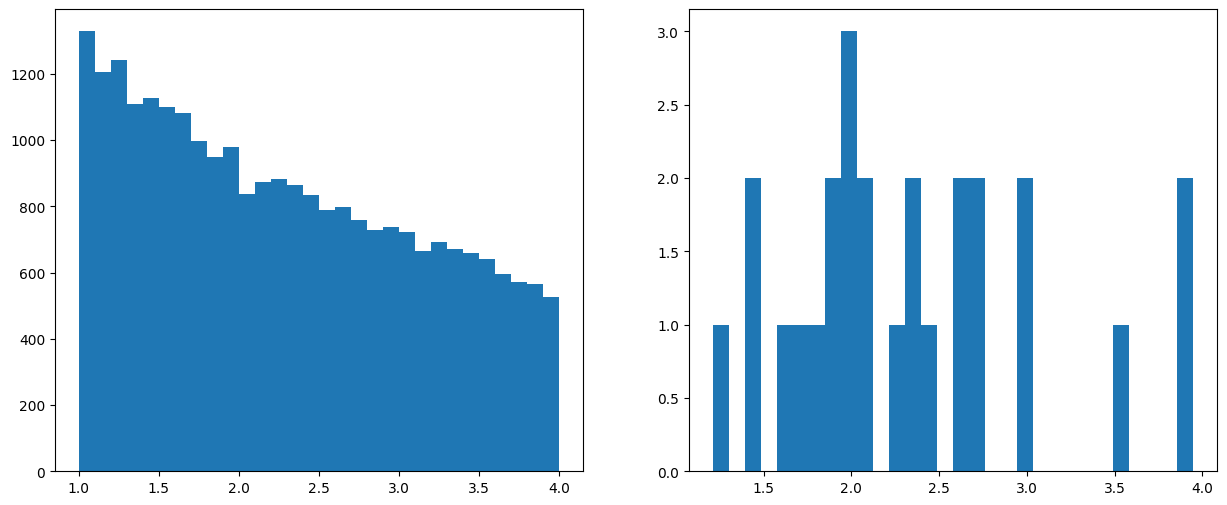

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].hist(filtered_sim_params["thetaE"], bins=30)
axs[1].hist(filtered_real_params["thetaE"], bins=30)
plt.show()

In [19]:
# normalizing parameters
def normalize_array(arr, min, max):
    range = max - min

    norm_arr = (arr - min)/range

    return norm_arr

norm_sim_params = pd.DataFrame()
norm_real_params = pd.DataFrame()

norm_sim_params["thetaE"] = normalize_array(filtered_sim_params["thetaE"], np.min(filtered_sim_params["thetaE"]), np.max(filtered_sim_params["thetaE"]))
norm_real_params["thetaE"] = normalize_array(filtered_real_params["thetaE"], np.min(filtered_sim_params["thetaE"]), np.max(filtered_sim_params["thetaE"])) # this must be normalized using simulated data limits since that is what the model will learn

print(norm_sim_params.min(), norm_sim_params.max())
print(norm_real_params.min(), norm_real_params.max())

thetaE    0.0
dtype: float64 thetaE    1.0
dtype: float64
thetaE    0.070412
dtype: float64 thetaE    0.982628
dtype: float64


In [20]:
# making metadata arrays
sim_exp_times = filtered_sim_params[["g_exp_time", "r_exp_time", "i_exp_time", "z_exp_time",]].to_numpy()
#display(sim_exp_times)
print(sim_exp_times.shape)

sim_mags_zero = filtered_sim_params[["g_mag_zero", "r_mag_zero", "i_mag_zero", "z_mag_zero",]].to_numpy()
#display(sim_mags_zero)
print(sim_mags_zero.shape)

real_exp_times = filtered_real_params[["g_exp_time", "r_exp_time", "i_exp_time", "z_exp_time",]].to_numpy()
#display(real_exp_times)
print(real_exp_times.shape)

real_mags_zero = filtered_real_params[["g_mag_zero", "r_mag_zero", "i_mag_zero", "z_mag_zero",]].to_numpy()
#display(real_mags_zero)
print(real_mags_zero.shape)

(25538, 4)
(25538, 4)
(26, 4)
(26, 4)


In [21]:
# normalized parameters
norm_sim_params.to_csv("data/norm_sim_params.csv", index=False)
norm_real_params.to_csv("data/norm_real_params.csv", index=False)

# non normalized parameters
filtered_sim_params.to_csv("data/sim_params.csv", index=False)
filtered_real_params.to_csv("data/real_params.csv", index=False)

# Image Preparation
Nas imagens simuladas fazemos remoção de fundo e normalização. Nas imagens reais, apenas a normalização.

In [24]:
normalize = MinMaxInterval()
#stretch = LogStretch(a=1)

def sigma_clip_bg(img, sigma=3):
    clipped_image = sigma_clip(img, 
                               sigma=sigma, 
                               maxiters=None, 
                               cenfunc='median', 
                               masked=True, 
                               copy=False)

    # clipped image contém somente pixels do céu 
    # Note que a imagem parece mais clara, mas é só uma redefinição nos limites do colormap do plot
    # agora calculamos o valor médio desses pixeis
    sky_mean = np.mean(clipped_image)
    sky_std = np.std(clipped_image)

    # e Subtraímos a média da imagem 
    sub_img = img - sky_mean

    # E clipamos valores acima de 100 sigma
    sigma_clipped_img = np.clip(sub_img, a_min=-10*sky_std, a_max=100*sky_std)
    
    return sigma_clipped_img

def ADU_to_flux(img, exp_time:float, mag_zero:float):
    flux_img = img * 10**(0.4*(30-mag_zero)) / exp_time
    return flux_img

def flux_conversion(image, exp_times, mags_zero):
    conv_bands = []
    for index, _ in enumerate(exp_times):
        conv_bands.append(ADU_to_flux(image[index], exp_times[index], mags_zero[index]))

    conv_image = np.stack(conv_bands, axis=0)
    return conv_image

def add_noise(image):
    random_noise = np.random.normal(0, 75, size=(4, 87, 87))
    noisy_img = image + random_noise
    return noisy_img

In [25]:
def prepare_sim_image(img,  img_exp_times, img_mags_zero, a_min=None, a_max=3000,):
    img = add_noise(img)
    img = np.clip(img, a_min=a_min, a_max=a_max)
    img = flux_conversion(img, img_exp_times, img_mags_zero)
    img = sigma_clip_bg(img)
    img = normalize(img)
    return img
    

def prepare_real_image(img, img_exp_times, img_mags_zero, a_min=None, a_max=3000, ):
    img = np.clip(img, a_min=a_min, a_max=a_max)
    img = flux_conversion(img, img_exp_times, img_mags_zero)
    img = sigma_clip_bg(img)
    img = normalize(img)
    return img

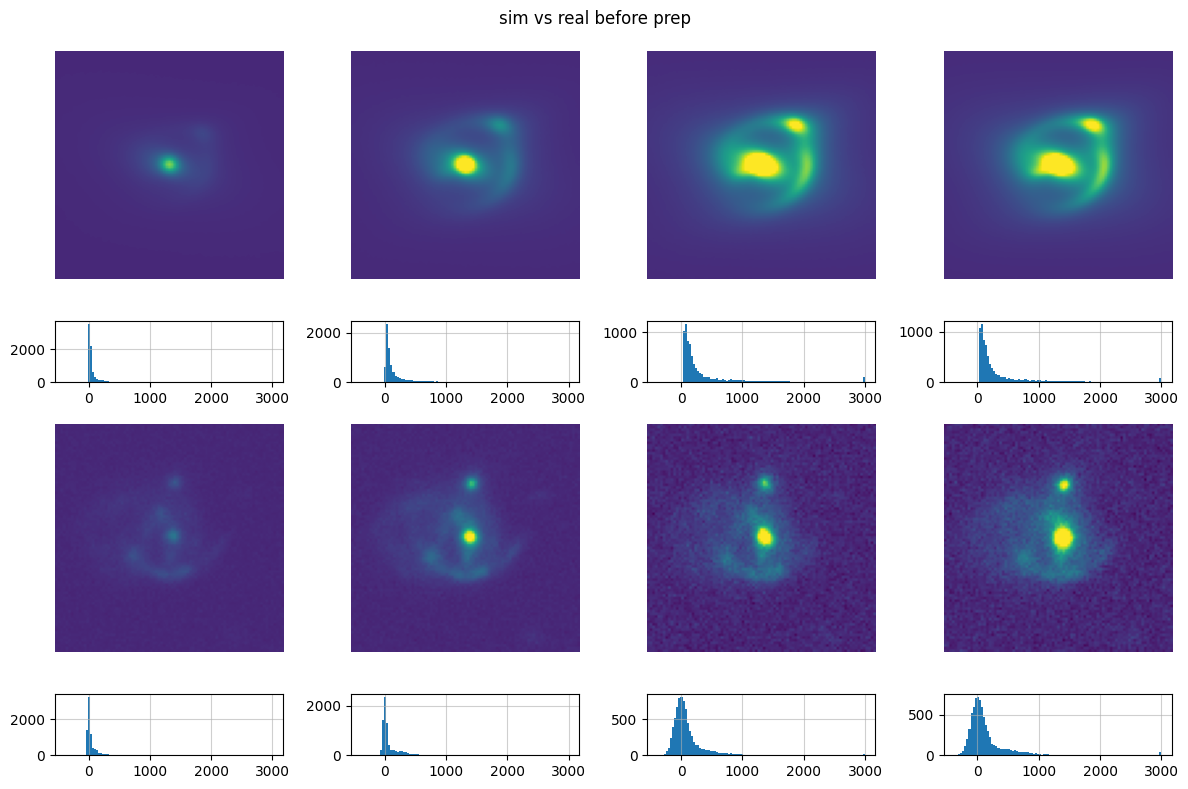

In [35]:
# comparing sims and real before prep
#sim_idx = np.random.randint(0, len(filtered_sim_imgs))
#real_idx = np.random.randint(0, len(filtered_real_imgs))

image_comparison(
    np.clip(filtered_sim_imgs[sim_idx], a_min=None, a_max=3000), # sim
    np.clip(filtered_real_imgs[real_idx], a_min=None, a_max=3000), # real
    title = "sim vs real before prep",
    color_scale_norm="full",
)

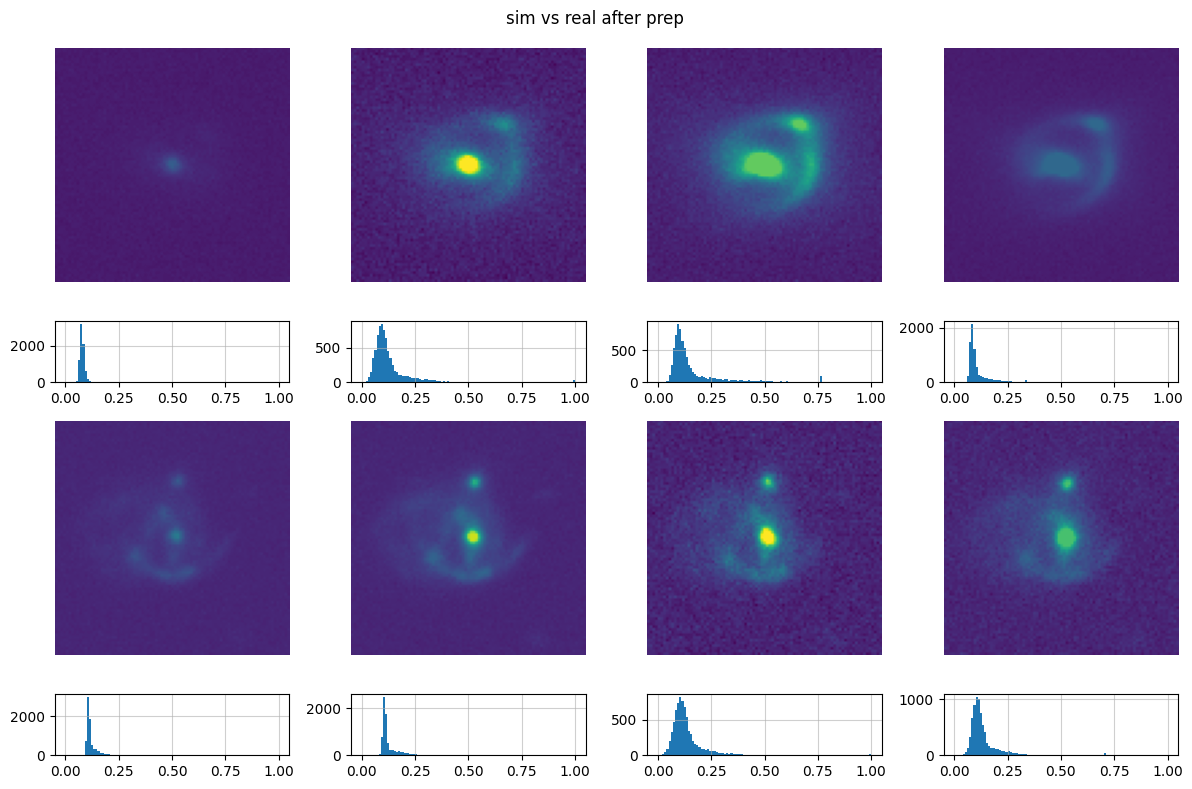

In [36]:
# comparing sims and real after prep
#sim_idx = np.random.randint(0, len(filtered_sim_imgs))
#real_idx = np.random.randint(0, len(filtered_real_imgs))

image_comparison(
    prepare_sim_image(filtered_sim_imgs[sim_idx], sim_exp_times[sim_idx], sim_mags_zero[sim_idx]), # sim after prep
    prepare_real_image(filtered_real_imgs[real_idx], real_exp_times[real_idx], real_mags_zero[real_idx]), # real after prep
    title = "sim vs real after prep",
    color_scale_norm="full",
)

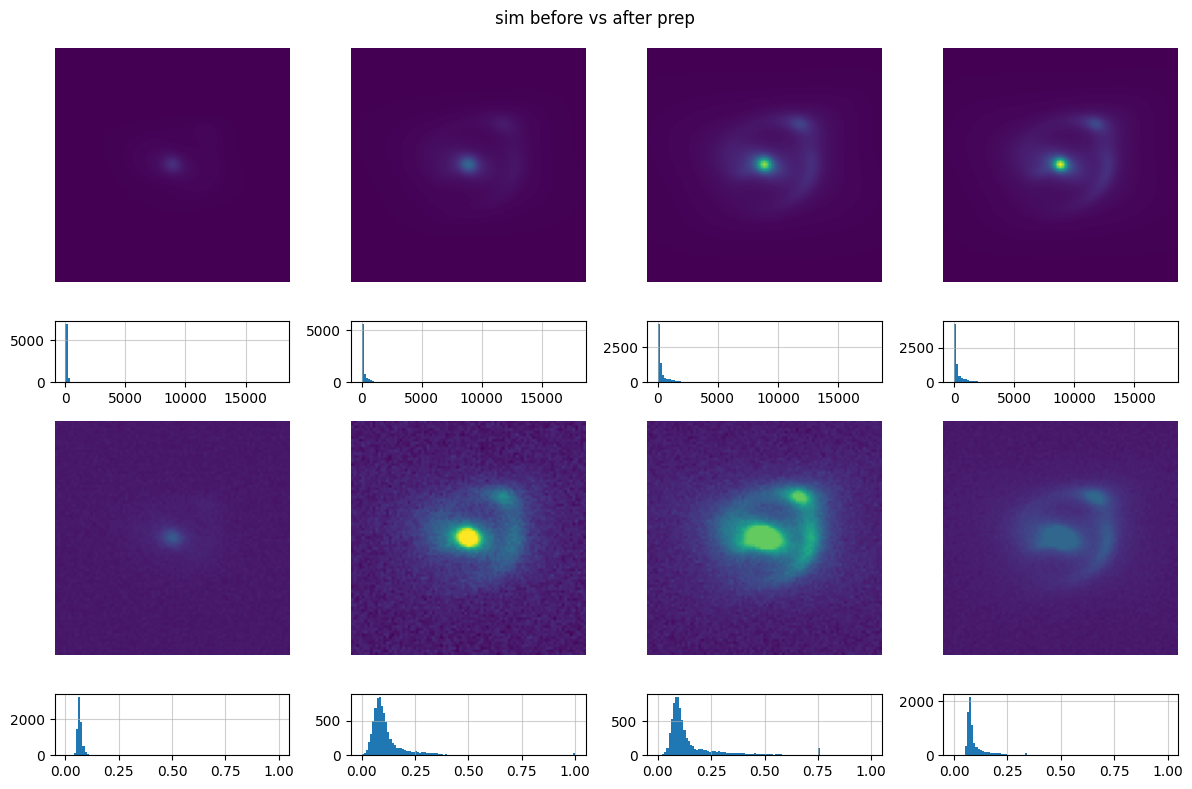

In [37]:
image_comparison(
    filtered_sim_imgs[sim_idx], # sim before prep
    prepare_sim_image(filtered_sim_imgs[sim_idx], sim_exp_times[sim_idx], sim_mags_zero[sim_idx]), # sim after prep
    title = "sim before vs after prep")

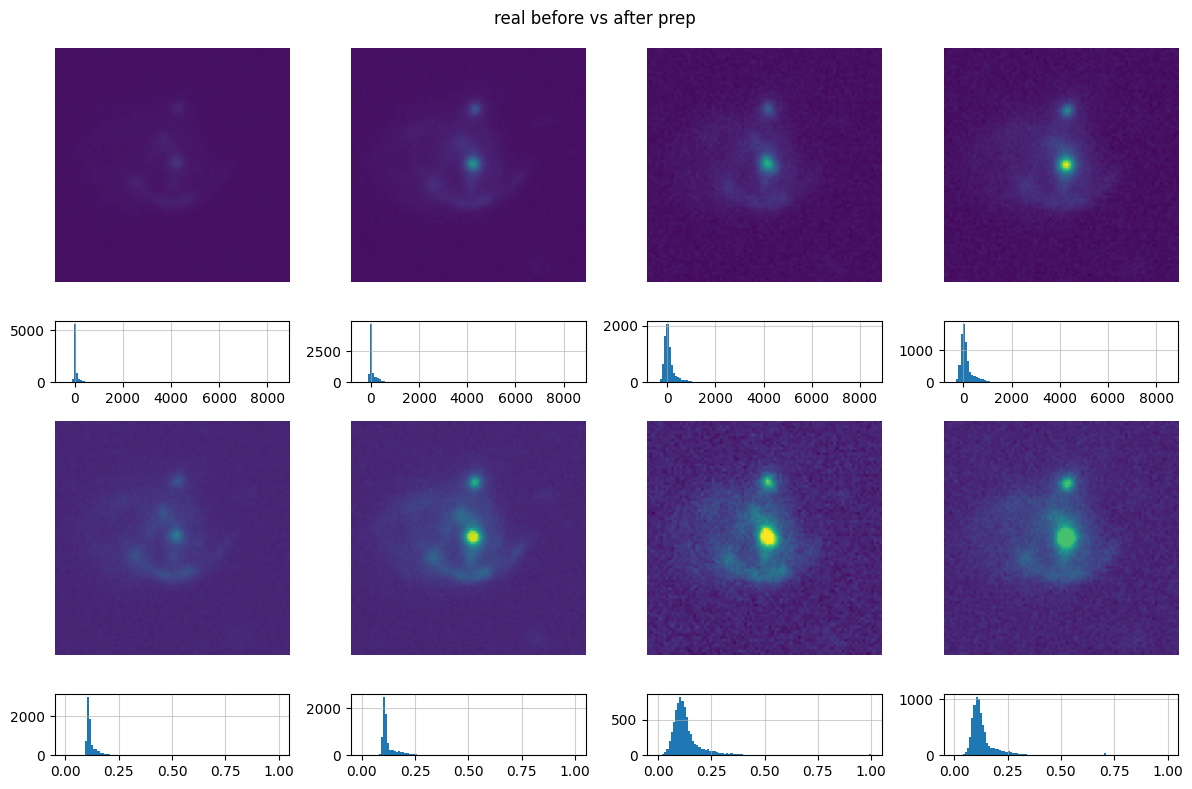

In [38]:
image_comparison(
    filtered_real_imgs[real_idx], # real before prep
    prepare_real_image(filtered_real_imgs[real_idx], real_exp_times[real_idx], real_mags_zero[real_idx]), # real after prep
    title = "real before vs after prep")

100%|█████████████████████████████████████████████████████████████████████████████| 25538/25538 [06:18<00:00, 67.40it/s]


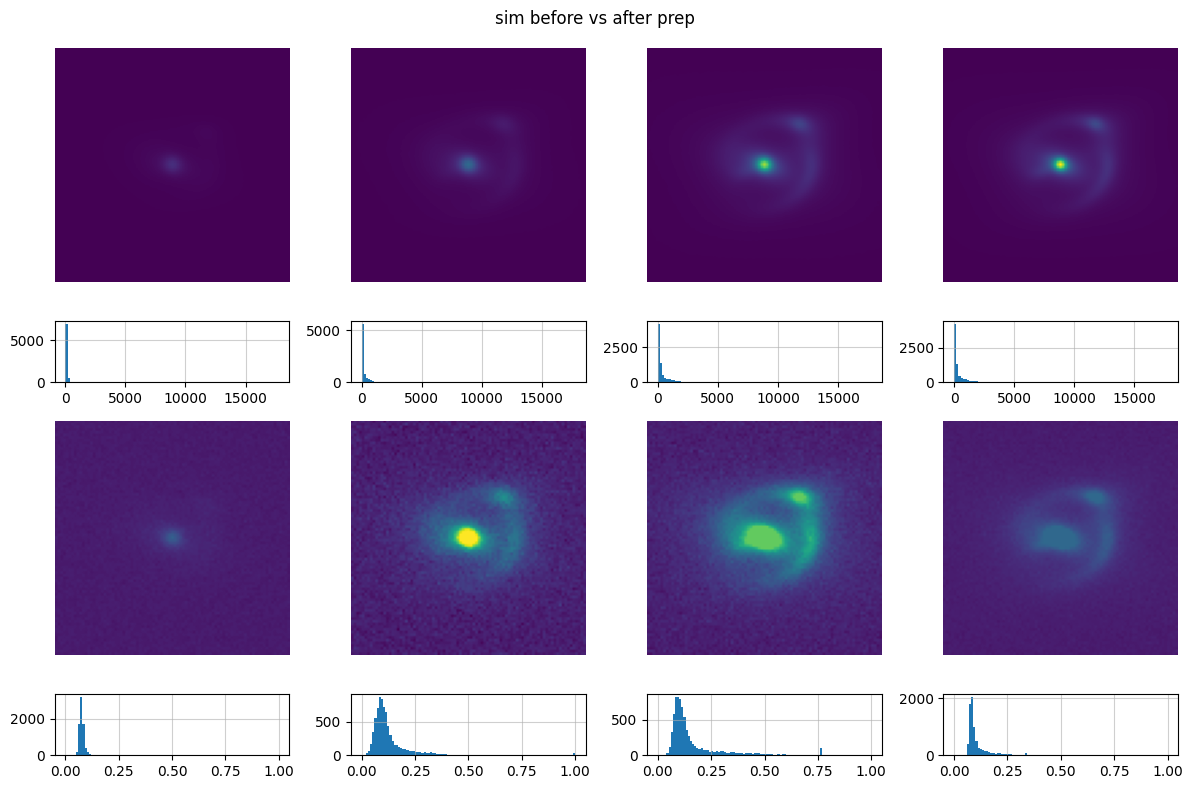

In [39]:
# preparing sims
prepared_sim_imgs = np.empty(shape=filtered_sim_imgs.shape)

for index, sim_img in enumerate(tqdm(filtered_sim_imgs)):
    prep_sim = prepare_sim_image(sim_img, sim_exp_times[index], sim_mags_zero[index])
    prepared_sim_imgs[index] = prep_sim

image_comparison(
    filtered_sim_imgs[sim_idx], # sim before prep
    prepared_sim_imgs[sim_idx], # sim after prep
                title = "sim before vs after prep")

100%|███████████████████████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 54.72it/s]


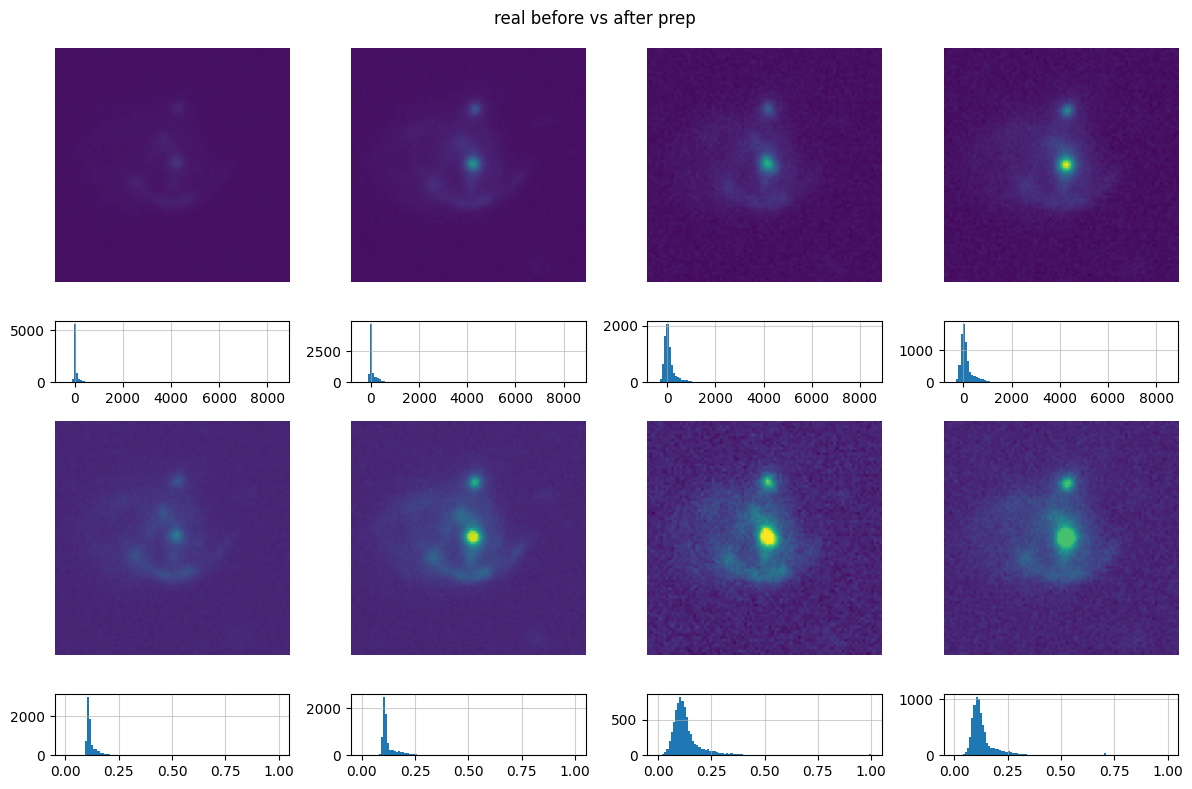

In [42]:
# preparing real
prepared_real_imgs = np.empty(shape=filtered_real_imgs.shape)

for index, real_img in enumerate(tqdm(filtered_real_imgs)):
    prep_real = prepare_real_image(real_img, real_exp_times[index], real_mags_zero[index])
    prepared_real_imgs[index] = prep_real


image_comparison(
    filtered_real_imgs[real_idx], # real before prep
    prepared_real_imgs[real_idx], # real after prep
                title = "real before vs after prep")

In [43]:
# processed images
np.save("data/prep_sim_imgs.npy", prepared_sim_imgs)
np.save("data/prep_real_imgs.npy", prepared_real_imgs)